In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np; np.random.seed(22)
import seaborn as sns; sns.set(color_codes=True)

In [2]:
df = pd.read_csv('data/train-file.csv')

In [3]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


## No Null values so no need for manipulating nan
Quite surprised to see this tbh, but easier for me!

In [4]:
df.isnull().any()

DateTime    False
Junction    False
Vehicles    False
ID          False
dtype: bool

### Split DateTime as Date and Time in seperate columns for easier manipulation

In [5]:
dt = []
tm = []
for x in df.DateTime:
    dt.append(x.split(" ")[0])
    tm.append(x.split(" ")[1])

In [6]:
df['dt'] = dt

In [7]:
df['tm']= tm

In [8]:
df.head()

,DateTime,Junction,Vehicles,ID,dt,tm
0,2015-11-01 00:00:00,1,15,20151101001,2015-11-01,00:00:00
1,2015-11-01 01:00:00,1,13,20151101011,2015-11-01,01:00:00
2,2015-11-01 02:00:00,1,10,20151101021,2015-11-01,02:00:00
3,2015-11-01 03:00:00,1,7,20151101031,2015-11-01,03:00:00
4,2015-11-01 04:00:00,1,9,20151101041,2015-11-01,04:00:00


### Dropped DateTime

DateTime column split hence
we don't need the combined column anymore.

In [9]:
df = df.drop('DateTime', axis=1)

In [10]:
# df = df.drop('ID', axis=1)

In [11]:
df.isnull().any()

Junction    False
Vehicles    False
ID          False
dt          False
tm          False
dtype: bool

In [12]:
df.head()

,Junction,Vehicles,ID,dt,tm
0,1,15,20151101001,2015-11-01,00:00:00
1,1,13,20151101011,2015-11-01,01:00:00
2,1,10,20151101021,2015-11-01,02:00:00
3,1,7,20151101031,2015-11-01,03:00:00
4,1,9,20151101041,2015-11-01,04:00:00


In [13]:
df.to_csv('data/processed.csv', index=False)

In [14]:
df = pd.read_csv('data/processed.csv')

In [15]:
x = df.drop('Vehicles', axis=1)
y = df.Vehicles.to_frame()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
df.head()

,Junction,Vehicles,ID,dt,tm
0,1,15,20151101001,2015-11-01,00:00:00
1,1,13,20151101011,2015-11-01,01:00:00
2,1,10,20151101021,2015-11-01,02:00:00
3,1,7,20151101031,2015-11-01,03:00:00
4,1,9,20151101041,2015-11-01,04:00:00


In [18]:
for x in df.tm.unique():
    df.loc[df.tm == x, 'tm'] = x[0:2]
#    df.ix[df.tm == 20000, 'my_channel'] = 0
 #   print(x[0:2])

In [19]:
df.head()

,Junction,Vehicles,ID,dt,tm
0,1,15,20151101001,2015-11-01,00
1,1,13,20151101011,2015-11-01,01
2,1,10,20151101021,2015-11-01,02
3,1,7,20151101031,2015-11-01,03
4,1,9,20151101041,2015-11-01,04


In [20]:
len(df.dt.unique())

608

In [21]:
df['dt']= df['dt'].astype(str)
df['Junction']= df['Junction'].astype(str)

In [22]:
a = (df['dt'] == '2015-11-01') & (df['Junction'] == '1')

In [23]:
b = (df['dt'] == '2015-11-01')

In [174]:
df[a].head()

,Junction,Vehicles,ID,dt,tm
0,1,15,20151101001,2015-11-01,00
1,1,13,20151101011,2015-11-01,01
2,1,10,20151101021,2015-11-01,02
3,1,7,20151101031,2015-11-01,03
4,1,9,20151101041,2015-11-01,04


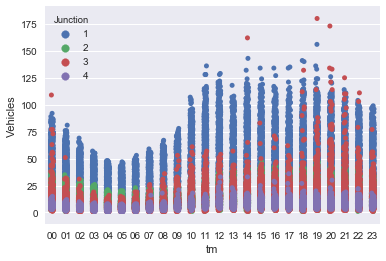

In [179]:
sns.stripplot(x="tm", y="Vehicles", data=df, jitter=True, hue="Junction");


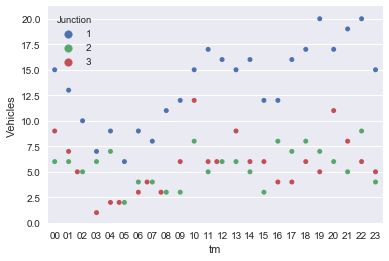

In [193]:
sns.swarmplot(x="tm", y="Vehicles", data=df[b], hue="Junction");


In [194]:
df.head()

,Junction,Vehicles,ID,dt,tm
0,1,15,20151101001,2015-11-01,00
1,1,13,20151101011,2015-11-01,01
2,1,10,20151101021,2015-11-01,02
3,1,7,20151101031,2015-11-01,03
4,1,9,20151101041,2015-11-01,04


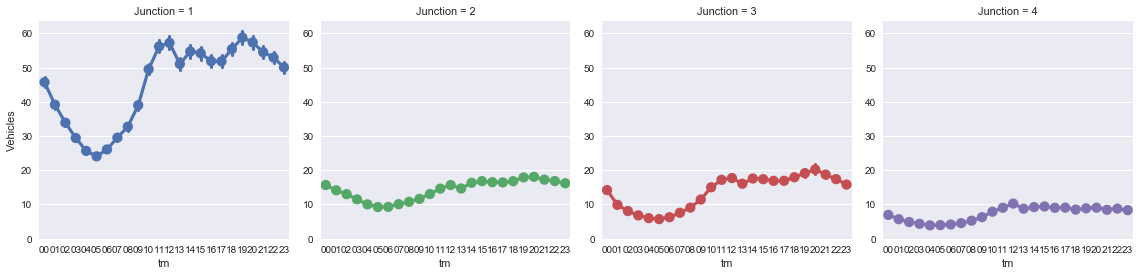

In [219]:
sns.factorplot(x="tm", y="Vehicles",hue="Junction",
               col="Junction", data=df);

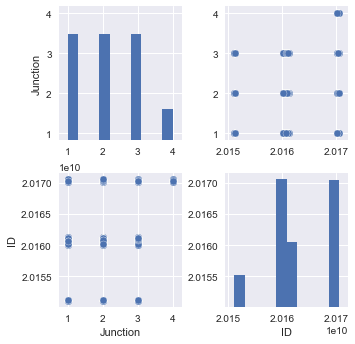

In [223]:
sns.pairplot(x_train);

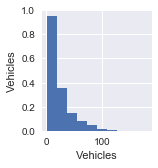

In [224]:
sns.pairplot(y_train);

,Junction,Vehicles,ID,dt,tm
0,1,15,20151101001,2015-11-01,00
1,1,13,20151101011,2015-11-01,01
2,1,10,20151101021,2015-11-01,02
3,1,7,20151101031,2015-11-01,03
4,1,9,20151101041,2015-11-01,04


ValueError: could not convert string to float: '03:00:00'

In [29]:
x_train.head()

,Junction,ID,dt,tm
30256,3,20151215163,2015-12-15,16:00:00
30018,3,20151205183,2015-12-05,18:00:00
33134,3,20160413143,2016-04-13,14:00:00
38627,3,20161128113,2016-11-28,11:00:00
16658,2,20160126022,2016-01-26,02:00:00


In [ ]:
def
for x in df.tm.unique():
    df.loc[df.tm == x, 'tm'] = x[0:2]
#    df.ix[df.tm == 20000, 'my_channel'] = 0
 #   print(x[0:2])